In [1]:
"""
Notebook to graph time series of notebooks
Authors: Jerry Song (jerrysong1324), Doris Lee (dorisjlee)
"""

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import math
import CategoryService


# Set flag to True to run on filtered notebooks (~500), False to run on all sample notebooks (~5500)
filtered = True

# Set flag to True to analyze each line of code, False to analyze each cell
analyzeLines = True

packageDicts, linesPerCell, codeCellsPerNB = CategoryService.analyzeFrequency(['pandas', 'sklearn', 'matplotlib'], filtered, analyzeLines)

Searching 587 notebooks for keywords...
Parsed 17650 cells
Parsed 124167 lines


In [2]:
df = pd.read_csv("NotebookCategoryInfo.csv",index_col=0)

In [3]:
# # Modified Simple Notebook Visualiser from psychemedia at https://gist.github.com/psychemedia/9b7808d81e3ee3461444330f3b0971ac

def nb_vis(cell_map, img_file='', linewidth=10, w=20, gap=None, gap_boost=1, gap_colour='black'):
    """Visualise notebook gross cell structure."""

    def get_gap(cell_map):
        """Automatically set the gap value based on overall length"""
        
        def get_overall_length(cell_map):
            """Get overall line length of a notebook."""
            overall_len = 0
            gap = 0
            for i ,(l,t) in enumerate(cell_map):
                #i is number of cells if that's useful too?
                overall_len = overall_len + l
            return overall_len

        max_overall_len = 0
        
        #If we are generating a plot for multiple notebooks, get the largest overall length
        if isinstance(cell_map,dict):
            for k in cell_map:
                _overall_len = get_overall_length(cell_map[k])
                max_overall_len = _overall_len if _overall_len > max_overall_len else max_overall_len
        else:
            max_overall_len = get_overall_length(cell_map)

        #Set the gap at 0.5% of the overall length
        return math.ceil(max_overall_len * 0.01)
        
        
    def plotter(cell_map, x, y, label='', header_gap = 0.2):
        """Plot visualisation of gross cell structure for a single notebook."""

        #Plot notebook path
        plt.text(y, x, label)
        x = x + header_gap

        for _cell_map in cell_map:

            #Add a coloured bar between cells
#             if y > 0:
#                 if gap_colour:
#                     plt.plot([y,y+gap],[x,x], gap_colour, linewidth=linewidth)
#                 y = y + gap
            
            _y = y + _cell_map[0] + 1 #Make tiny cells slightly bigger
            plt.plot([y,_y],[x,x], _cell_map[1], linewidth=linewidth)

            y = _y
    
    x=0
    y=0
    
    #If we have a single cell_map for a single notebook
    if isinstance(cell_map,list):
        gap = gap if gap is not None else get_gap(cell_map) * gap_boost
        fig, ax = plt.subplots(figsize=(w, 1))
        plotter(cell_map, x, y)
    #If we are plotting cell_maps for multiple notebooks
    elif isinstance(cell_map,dict):
        gap = gap if gap is not None else get_gap(cell_map) * gap_boost
        fig, ax = plt.subplots(figsize=(w,len(cell_map)))
        for k in cell_map:
            plotter(cell_map[k], x, y, k)
            x = x + 1

    ax.axis('off')
    plt.gca().invert_yaxis()


In [4]:
# VIS_COLOUR_MAP  = {'markdown':'cornflowerblue','code':'pink'}
VIS_COLOUR_MAP  = {'create':'#f54949','join':'#ff2121',
                   'cleaning':'#00ff3f','group':'#99ffb2','preprocessing':'#44fc71',
                   'model':'#00fbff',
                   'plot':'#fffc6b','print':'#faed25',
                   'postprocessing':'#7700ff','stats':'#b77dfa', 
                   'other':'grey'} 



ingestion = join and create (reds)

inspect = print and plot (yellows)

wrangling = pre, group, clean (greens)

modeling = model (aqua)

compute = post and stats (purples)

In [5]:
lineDict = {}
for nbName in df.name.unique()[:50]:
    categoryList = df[df['name']==nbName]['category']
    lineMap = []
    for category in categoryList:
        lineMap.append((1, VIS_COLOUR_MAP[category]))
    lineDict[nbName] = lineMap


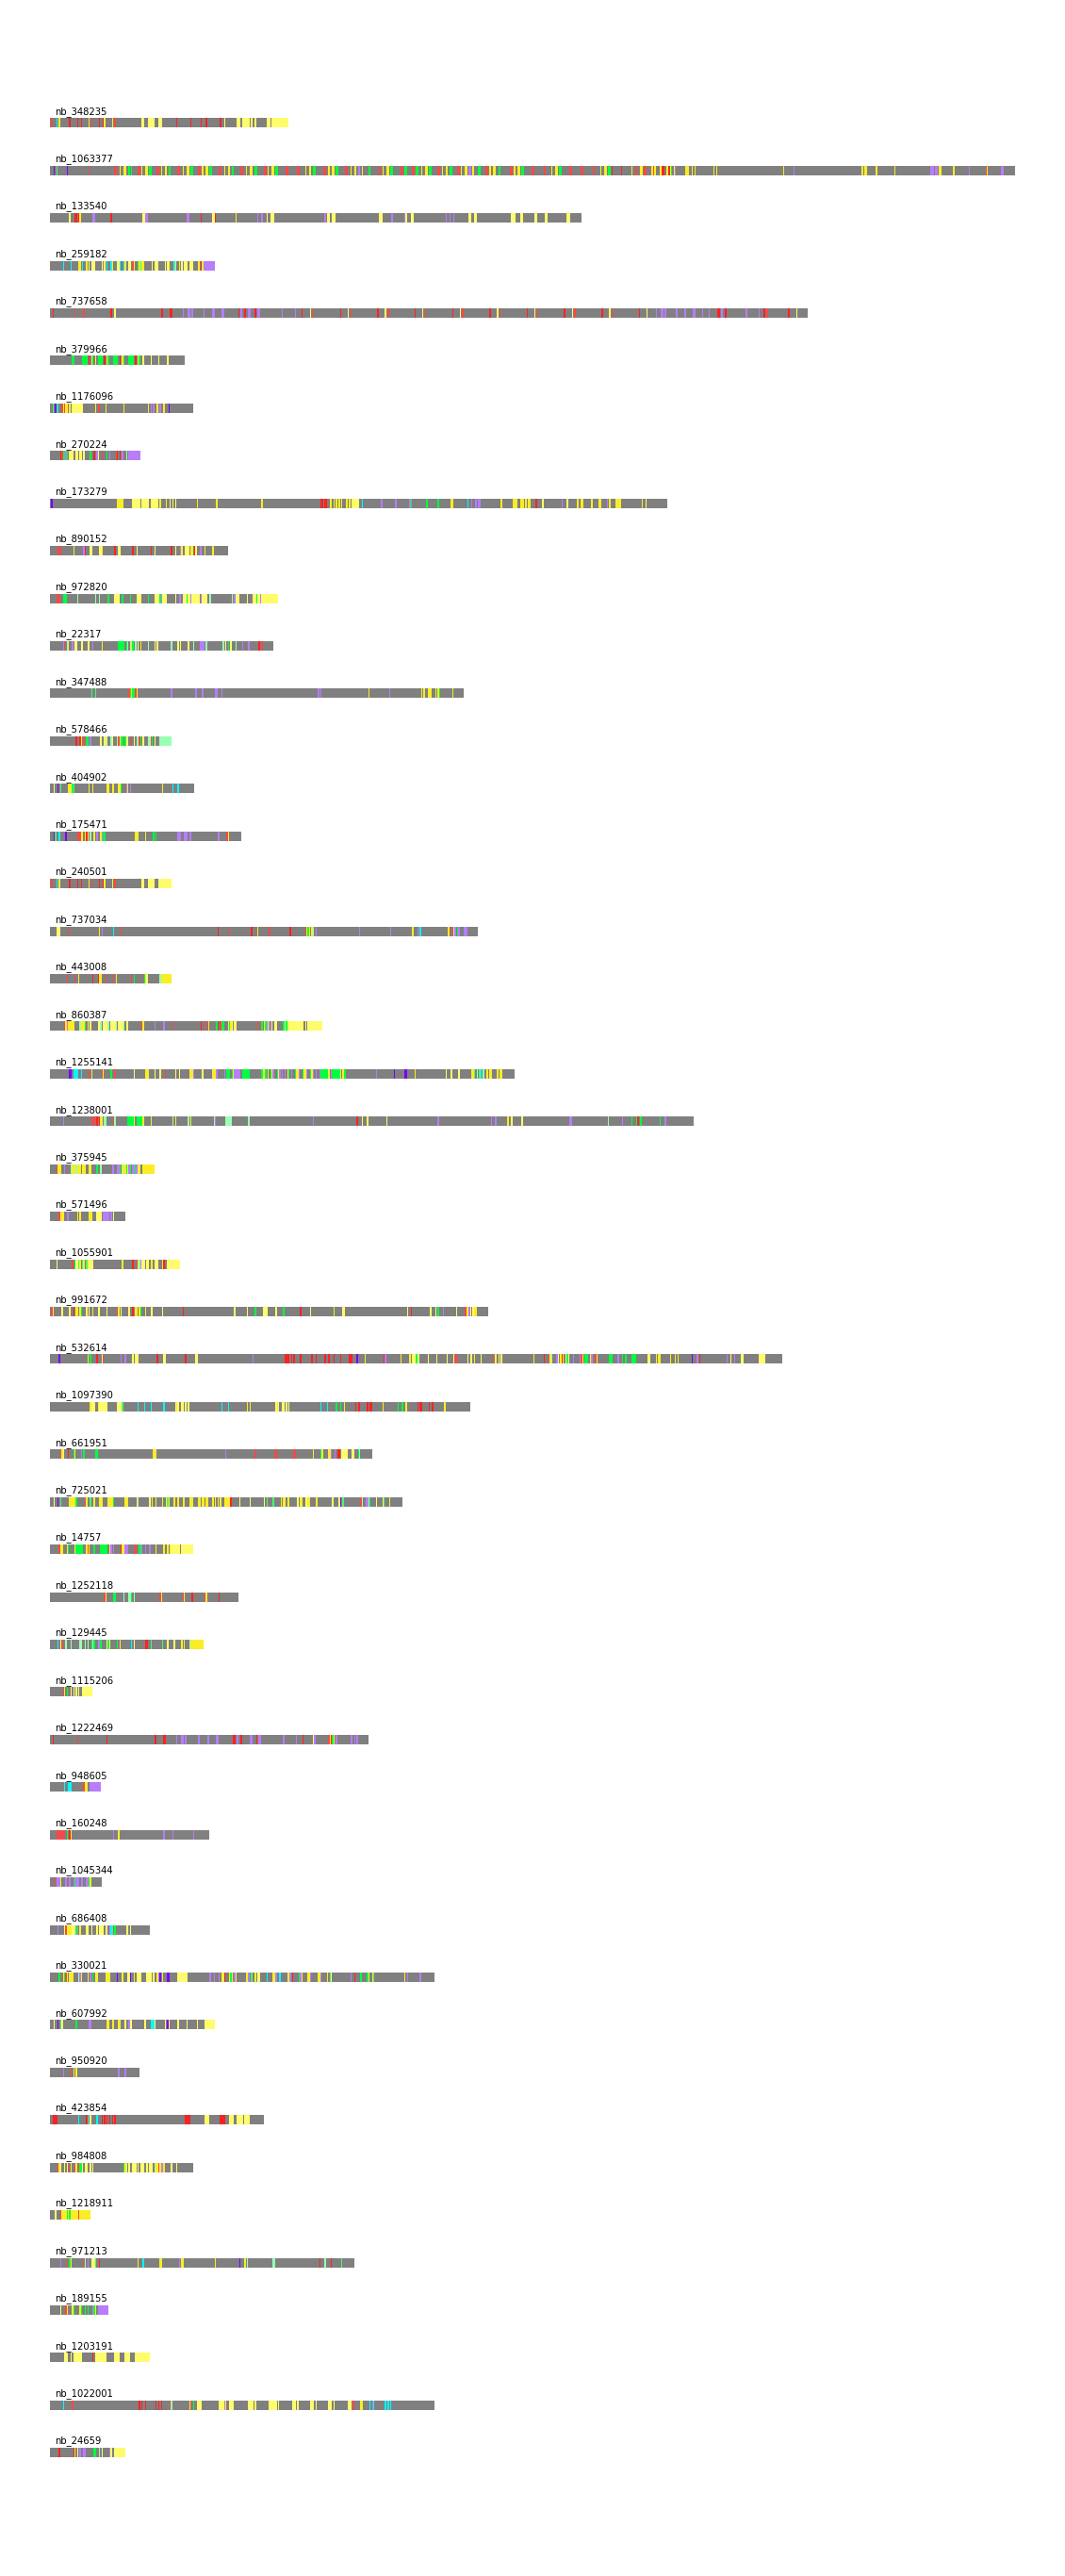

In [6]:
nb_vis(lineDict)